# Unused imports

In [48]:
# might remove
# from sklearn.metrics import calinski_harabasz_score

In [15]:
# from gensim.matutils import Dense2Corpus

In [35]:
# import multiprocessing

In [12]:
# from gensim.models import LdaModel

In [113]:
# from sklearn.metrics import silhouette_samples

In [95]:
# from sklearn.metrics import silhouette_score

# Used imports

In [53]:
import pandas as pd
import numpy as np

In [109]:
import pdb

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.utils import resample

In [85]:
from sklearn.feature_selection import chi2

In [31]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [23]:
from gensim.matutils import Sparse2Corpus

In [20]:
from scipy.sparse import csr_matrix

In [10]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [12]:
from tqdm import tqdm

In [125]:
from sklearn.metrics import davies_bouldin_score

In [14]:
entity_counts_labels_df = pd.read_csv('entity_counts_labels_df.csv')

In [15]:
english_tweets = pd.read_csv('english_tweets.csv')

C:\Users\ryanc\AppData\Local\Temp\ipykernel_38976\2925272866.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  english_tweets = pd.read_csv('english_tweets.csv')


https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/simple-topic-identification?ex=13

<!-- 
In that case, you can use TF-IDF as a preprocessing step for clustering and NER (Named Entity Recognition) models without needing labeled data.

Since you don't have labeled data, you can simply compute TF-IDF on your tweet data and use the resulting features as input to your clustering or NER model
s.
For clustering, TF-IDF can help group similar tweets together based on their semantic meani
ng.
For NER, TF-IDF can help identify important keywords and phrases in your tweets, which can then be used as input to your NER model to identify entities such as names, locations, and organizati
ons.
So, go ahead and compute TF-IDF on your tweet data, and then use the resulting features as input to your clustering or NER models. No labels requ -->ired!

In [16]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the 'text' column and transform it into a matrix
tfidf_matrix = vectorizer.fit_transform(english_tweets['text'])

In [7]:
X_train, X_test = train_test_split(tfidf_matrix, test_size=0.2, random_state=42)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(entity_counts_labels_df.data, entity_counts_labels_df.target, test_size=0.2, random_state=42)

In [10]:
tfidf_matrix[:5, :10]

<5x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [11]:
tfidf_matrix.nonzero()

(array([      0,       0,       0, ..., 1048586, 1048586, 1048586]),
 array([ 28887, 239643, 504995, ..., 396841, 400999, 350159]))

In [22]:
tfidf_matrix_sparse = csr_matrix(tfidf_matrix)

In [23]:
# Normalize the TF-IDF matrix
normalizer = Normalizer()
normalized_tfidf_matrix = normalizer.fit_transform(tfidf_matrix_sparse)

# Determine the number of clusters (k)
k = 5  # for example

# Apply k-means clustering with tqdm progress bar
kmeans = KMeans(n_clusters=k)
with tqdm(total=normalized_tfidf_matrix.shape[0], desc="K-means clustering") as pbar:
    kmeans.fit(normalized_tfidf_matrix)
    pbar.update(normalized_tfidf_matrix.shape[0])

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

K-means clustering:   0%|                                                                  | 0/1048587 [00:00<?, ?it/s]c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
K-means clustering: 100%|█████████████████████████████████████████████████| 1048587/1048587 [01:36<00:00, 10869.10it/s]


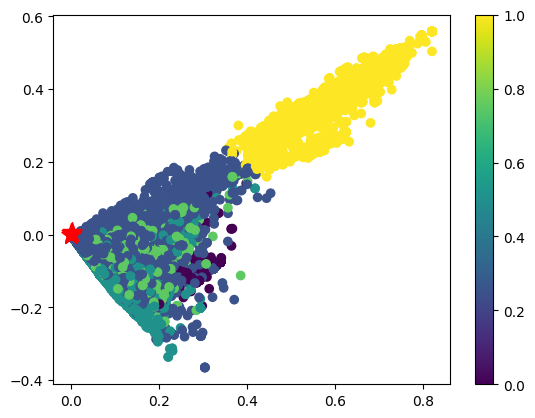

In [33]:
# Reduce dimensionality using TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
reduced_data = tsvd.fit_transform(normalized_tfidf_matrix)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red')
plt.colorbar()
plt.show()

In [24]:
labels

array([1, 2, 1, ..., 3, 1, 1])

In [25]:
centers

array([[0.00000000e+00, 1.08344640e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.67869461e-04, 3.28431549e-03, 9.54973576e-06, ...,
        3.72654980e-07, 9.20436327e-07, 9.38877372e-07],
       [1.10135510e-03, 6.34085812e-03, 1.34956948e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.64950815e-06],
       [3.16337590e-04, 3.31837873e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.30544475e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [134]:
wcss

[1028486.6803195885,
 1026131.4158610171,
 1024532.8922546656,
 1022016.6932476986,
 1020424.0322632578,
 1018669.2669660578,
 1016678.4647836933,
 1014778.2759249344,
 1013987.6631349096,
 1010630.4209661108,
 1009407.3711919315,
 1008648.8277516795,
 1007775.9491232629]

Finding the best kmeans

Finding the best kmeans

In [133]:
# finding the best kmeans

wcss = []
with tqdm(total=13, desc="K-means clustering") as pbar:
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10)
        with tqdm(total=normalized_tfidf_matrix.shape[0], desc="K-means clustering") as pbar:    
            kmeans.fit(normalized_tfidf_matrix)
            wcss.append(kmeans.inertia_)
            pbar.update(normalized_tfidf_matrix.shape[0])

K-means clustering: 100%|█████████████████████████████████████████████████| 1048587/1048587 [00:48<00:00, 21474.66it/s]

K-means clustering: 100%|█████████████████████████████████████████████████| 1048587/1048587 [00:56<00:00, 18577.83it/s]

K-means clustering: 100%|█████████████████████████████████████████████████| 1048587/1048587 [01:36<00:00, 10870.43it/s]

K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [02:20<00:00, 7481.40it/s]

K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [02:35<00:00, 6729.97it/s]

K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [02:31<00:00, 6923.74it/s]

K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [02:33<00:00, 6822.02it/s]

K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [02:47<00:00, 6262.44it/s]

K-means clustering: 100%|███████

In [137]:
# results:
# [1028486.6803195885,
 # 1026131.4158610171,
 # 1024532.8922546656,
 # 1022016.6932476986,
 # 1020424.0322632578,
 # 1018669.2669660578,
 # 1016678.4647836933,
 # 1014778.2759249344,
 # 1013987.6631349096,
 # 1010630.4209661108,
 # 1009407.3711919315,
 # 1008648.8277516795,
 # 1007775.9491232629]

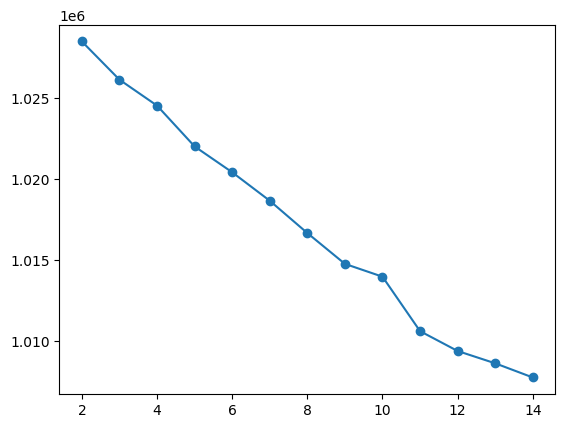

In [140]:
plt.plot(range(2,15), wcss, marker='o')
plt.show()

Notice the drop from 10-11. Elbow method is showing me 11 fold kmeans is best.

In [141]:
# Normalize the TF-IDF matrix
normalizer = Normalizer()
normalized_tfidf_matrix = normalizer.fit_transform(tfidf_matrix_sparse)

In [142]:
k = 11

# Apply k-means clustering with tqdm progress bar
kmeans2 = KMeans(n_clusters=k)
with tqdm(total=normalized_tfidf_matrix.shape[0], desc="K-means clustering") as pbar:
    kmeans2.fit(normalized_tfidf_matrix)
    pbar.update(normalized_tfidf_matrix.shape[0])

K-means clustering:   0%|                                                                  | 0/1048587 [00:00<?, ?it/s]c:\users\ryanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
K-means clustering: 100%|██████████████████████████████████████████████████| 1048587/1048587 [03:22<00:00, 5174.24it/s]


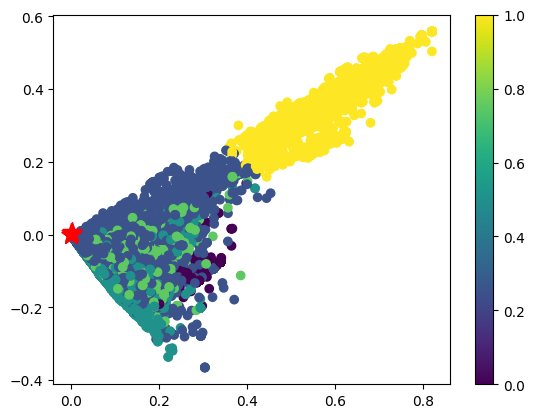

In [143]:
# Reduce dimensionality using TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
reduced_data = tsvd.fit_transform(normalized_tfidf_matrix)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red')
plt.colorbar()
plt.show()

In [144]:
# Get the cluster labels
labels2 = kmeans2.labels_

# Get the cluster centers
centers2 = kmeans2.cluster_centers_

In [145]:
# second cluster dataframe, 11 kmeans

# Create a dataframe with cluster labels, tweet texts, and row numbers
cluster_df2 = pd.DataFrame({
    'Cluster': labels2,
    'Tweet': english_tweets['text'],
    'Row Number': range(len(english_tweets))
})

# Print the dataframe
cluster_df2.head()

,Cluster,Tweet,Row Number
0,7,"Ukrainians gathering in Warsaw, Poland chantin...",0
1,6,Ukrainian citizens destroy 2 Russian tanks wit...,1
2,5,#WritingCommunity #writing #amwriting #poem #p...,2
3,7,@DaveKeating @dougf24 @whilderbrandt @joekeen9...,3
4,7,A reminder for the Texas Trumpers:\n\n#Ukraine...,4


In [147]:
dbi = davies_bouldin_score(reduced_data, labels2)

with tqdm(total=len(reduced_data), unit='samples') as pbar:
    for i in range(len(reduced_data)):
        # compute DBI for current sample
        # ...
        # update progress bar every 0.5%
        if i % int(len(reduced_data) * 0.005) == 0:
            pbar.update(int(len(reduced_data) * 0.005))

print(f"Davies-Bouldin Index: {dbi:.3f}")

1053642samples [00:00, 7195708.68samples/s]                                                                            

Davies-Bouldin Index: 9.096


In [148]:
type(reduced_data)

numpy.ndarray

## Just saving stuff as pickles and csvs

In [101]:
# import joblib

In [26]:
# import pickle

In [146]:
# cluster_df2.to_csv('cluster_df2.csv', index=False)

In [149]:
# with open('reduced_data.pkl', 'wb') as f:
#     pickle.dump(reduced_data, f)

In [28]:
# with open('k_means_labels.pkl', 'wb') as f:
#     pickle.dump(labels, f)

In [27]:
# with open('k_means_centers.pkl', 'wb') as f:
#     pickle.dump(centers, f)

In [96]:
# cluster_df.to_csv('cluster_df.csv', index=False)

In [102]:
# joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [108]:
# =======
# Scrap
# =======

# luster_entities = {}
# for i, label in enumerate(labels):
#     if label not in cluster_entities:
#         cluster_entities[label] = []
#     cluster_entities[label].append(english_tweets.iloc[i]['text'][:50])
#     if len(cluster_entities[label]) >= 10:  # print 10 examples per cluster
#         break

# for label, tweet_texts in cluster_entities.items():
#     print(f'Cluster {label}:')
#     for tweet in tweet_texts:
#         print(f'  {tweet}')

## Older clusters (5 kmeans)

In [37]:
# Create a dataframe with cluster labels, tweet texts, and row numbers
cluster_df = pd.DataFrame({
    'Cluster': labels,
    'Tweet': english_tweets['text'],
    'Row Number': range(len(english_tweets))
})

# Print the dataframe
cluster_df.head()

,Cluster,Tweet,Row Number
0,1,"Ukrainians gathering in Warsaw, Poland chantin...",0
1,2,Ukrainian citizens destroy 2 Russian tanks wit...,1
2,1,#WritingCommunity #writing #amwriting #poem #p...,2
3,1,@DaveKeating @dougf24 @whilderbrandt @joekeen9...,3
4,1,A reminder for the Texas Trumpers:\n\n#Ukraine...,4


In [39]:
cluster_df.Cluster.value_counts()

Cluster
1    676440
2    207998
3    135440
4     14993
0     13716
Name: count, dtype: int64

Here are my clusters from tf idf and clustering.

In [43]:
cluster_df[cluster_df.Cluster == 0].head()

,Cluster,Tweet,Row Number
42,0,.@ZelenskyyUa's tv address to the Russian (!) ...,42
45,0,.@ZelenskyyUa's tv address to the Russian (!) ...,45
75,0,.@ZelenskyyUa's tv address to the Russian (!) ...,75
124,0,.@ZelenskyyUa's tv address to the Russian (!) ...,124
224,0,.@ZelenskyyUa's tv address to the Russian (!) ...,224


In [44]:
cluster_df[cluster_df.Cluster == 1].head()

,Cluster,Tweet,Row Number
0,1,"Ukrainians gathering in Warsaw, Poland chantin...",0
2,1,#WritingCommunity #writing #amwriting #poem #p...,2
3,1,@DaveKeating @dougf24 @whilderbrandt @joekeen9...,3
4,1,A reminder for the Texas Trumpers:\n\n#Ukraine...,4
5,1,#Poland now refusing to play next month's #Wor...,5


In [45]:
cluster_df[cluster_df.Cluster == 2].head()

,Cluster,Tweet,Row Number
1,2,Ukrainian citizens destroy 2 Russian tanks wit...,1
7,2,Ukrainian citizens destroy 2 Russian tanks wit...,7
15,2,Vasylkiv right now.\nA local oil terminal has ...,15
27,2,#Ukraine air defence has downed a russian IL-7...,27
29,2,#Russian jets shooting at #Ukraine civilians. ...,29


In [46]:
cluster_df[cluster_df.Cluster == 3].head()

,Cluster,Tweet,Row Number
35,3,"From now on, Russian mothers can look up their...",35
47,3,Putin Thread 1/\n\nDid not want to write this\...,47
105,3,Stop #Putin Now.\n#StandWithUkraine \n#StopRus...,105
111,3,🇺🇦 #StandWithUkraine 🇺🇦\n\n#Ukraine #StopPuti...,111
152,3,JUST IN: Hacking group #Anonymous launches 'fu...,152


In [47]:
cluster_df[cluster_df.Cluster == 4].head()

,Cluster,Tweet,Row Number
144805,4,@SenHydeSmith Ukraine needs weapons and humani...,144805
144808,4,@SenWhitehouse Ukraine needs weapons and human...,144808
145387,4,@ossoff Ukraine needs weapons and humanitarian...,145387
145514,4,@SenatorLujan Ukraine needs weapons and humani...,145514
145662,4,@SenatorHick Ukraine needs weapons and humanit...,145662


In [117]:
reduced_data[:2]

array([[ 0.07682605, -0.10481955],
       [ 0.08727308, -0.12988956]])

In [120]:
type(reduced_data)

numpy.ndarray

In [127]:
dbi = davies_bouldin_score(reduced_data, labels)

with tqdm(total=len(reduced_data), unit='samples') as pbar:
    for i in range(len(reduced_data)):
        # compute DBI for current sample
        # ...
        # update progress bar every 0.5%
        if i % int(len(reduced_data) * 0.005) == 0:
            pbar.update(int(len(reduced_data) * 0.005))

print(f"Davies-Bouldin Index: {dbi:.3f}")

1053642samples [00:00, 6829448.05samples/s]                                                                            

Davies-Bouldin Index: 2.768


In [126]:
# silhouette = silhouette_score(reduced_data, labels)

# reshape_data = reduced_data.reshape(1, -1)

# Calculate Silhouette Coefficient for each sample
for i in range(len(reduced_data)):
    print(f"Progress: {(i+1)/len(reduced_data)*100:.2f}%")
    dbi = davies_bouldin_score(reduced_data, labels)
    print(f"Davies-Bouldin Index: {dbi:.3f}")

# silhouette = silhouette_score_tqdm(reduced_data, labels)
# print("Silhouette Coefficient:", silhouette)

Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin Index: 2.768
Progress: 0.00%
Davies-Bouldin I

KeyboardInterrupt: 

In [ ]:
# it's not running

In [103]:
# chi_scores, p_values = chi2(reduced_data, labels)
# reduced_feature_names = ['Reduced_Feature_{}'.format(i) for i in range(reduced_data.shape[1])]
# results = list(zip(reduced_feature_names, chi_scores, p_values))

## Testing Chi samples

I have to sample the data because chi scores need dense arrays instead of sparse.

In [82]:
# Set the sample size
sample_size = int(0.01 * tfidf_matrix.shape[0])

# Randomly sample the data points
sample_indices = np.random.choice(tfidf_matrix.shape[0], sample_size, replace=False)

# Select the sampled data points and labels
X_sample = tfidf_matrix[sample_indices, :]
y_sample = labels[sample_indices]

In [84]:
X_sample.shape

(10485, 589956)

In [88]:
# Resample the data to reduce memory usage
X_resampled, y_resampled = resample(X_sample, y_sample, n_samples=10000, random_state=42)

# Calculate the CHI score
chi_scores = chi2(X_resampled, y_resampled)

print(chi_scores)

(array([1.87179353, 9.06785044, 0.22310764, ...,        nan,        nan,
              nan]), array([0.75932447, 0.05942574, 0.99422181, ...,        nan,        nan,
              nan]))


In [91]:
chi_scores, p_values = chi2(X_resampled, y_resampled)

In [92]:
# Set a threshold for Chi scores and p-values
chi_threshold = 5
p_threshold = 0.05

# results
results = list(zip(chi_scores, p_values))

# Filter the results
filtered_results = [(chi_score, p_value) for chi_score, p_value in results if chi_score > chi_threshold and p_value < p_threshold]

# Print the filtered results
for i, (chi_score, p_value) in enumerate(filtered_results):
	print(f"Feature {i}: Chi score = {chi_score:.3f}, p-value = {p_value:.3f}")

Feature 0: Chi score = 52.788, p-value = 0.000
Feature 1: Chi score = 18.974, p-value = 0.001
Feature 2: Chi score = 9.997, p-value = 0.040
Feature 3: Chi score = 21.716, p-value = 0.000
Feature 4: Chi score = 19.279, p-value = 0.001
Feature 5: Chi score = 19.507, p-value = 0.001
Feature 6: Chi score = 11.354, p-value = 0.023
Feature 7: Chi score = 10.433, p-value = 0.034
Feature 8: Chi score = 15.190, p-value = 0.004
Feature 9: Chi score = 18.722, p-value = 0.001
Feature 10: Chi score = 17.404, p-value = 0.002
Feature 11: Chi score = 12.468, p-value = 0.014
Feature 12: Chi score = 9.532, p-value = 0.049
Feature 13: Chi score = 268.860, p-value = 0.000
Feature 14: Chi score = 19.278, p-value = 0.001
Feature 15: Chi score = 9.729, p-value = 0.045
Feature 16: Chi score = 80.709, p-value = 0.000
Feature 17: Chi score = 444.972, p-value = 0.000
Feature 18: Chi score = 9.830, p-value = 0.043
Feature 19: Chi score = 19.212, p-value = 0.001
Feature 20: Chi score = 9.771, p-value = 0.044
Featu

In [83]:
# # Calculate the variance of each feature
# variances = np.var(X_sample, axis=0)

# # Select the top N features with the highest variance
# N = 10000  # adjust this value to select more or fewer features
# selected_features = np.argsort(variances)[::-1][:N]

# # Select the corresponding columns from the data matrix
# X_selected = X_sample[:, selected_features]

AxisError: axis 0 is out of bounds for array of dimension 0

In [79]:
chi_score = calinski_harabasz_score(X_sample.toarray(), labels)
print("Calinski-Harabasz Index:", chi_score)

MemoryError: Unable to allocate 6.91 GiB for an array with shape (3145, 589956) and data type float32

In [ ]:
# corpus = Sparse2Corpus(tfidf_matrix_sparse)

# def train_lda(corpus, num_topics, passes):
#     lda_model = LdaModel(
#         corpus=corpus,
#         num_topics=num_topics,
#         passes=passes
#     )
#     lda_model.train(corpus, iterations=passes)

# if __name__ == '__main__':
#     progress_bar = tqdm(total=15, desc="Training LDA", unit="passes")

#     p = multiprocessing.Process(target=train_lda, args=(corpus, 3, 15))
#     p.start()

#     while p.is_alive():
#         progress_bar.update(1)
#         time.sleep(1)

#     progress_bar.close()

In [ ]:
# # Load a sample dataset (e.g., 20 Newsgroups)
# data = load_files('path/to/20newsgroups')

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# # Initialize the TF-IDF vectorizer
# vectorizer = TfidfVectorizer(stop_words='english')

# # Fit the vectorizer to the training data and transform both the training and test data
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Now you can use the TF-IDF transformed data for classification, clustering, or other tasks
# # For example, train a simple classifier
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train_tfidf, y_train)

# # Evaluate the classifier on the test data
# print("Accuracy:", clf.score(X_test_tfidf, y_test))